In [1]:
import numpy as np
from scipy.special import binom
from numpy.linalg import cond

import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

# 1. Постановка задачи

Дана численность  населения США в разные годы.

In [2]:
populations = np.array([92228496, 106021537, 123202624, 132164569, 151325798, 
          179323175, 203211926, 226545805, 248709873, 281421906])
dates = np.arange(1910, 2010, 10)

population_with_2010 = np.concatenate((populations, [308745538]))
dates_with_2010 = np.concatenate((dates, [2010]))

population_with_2010_2018 = np.concatenate((populations, [308745538, 327908413]))
dates_with_2010_2018 = np.concatenate((dates, [2010, 2018]))

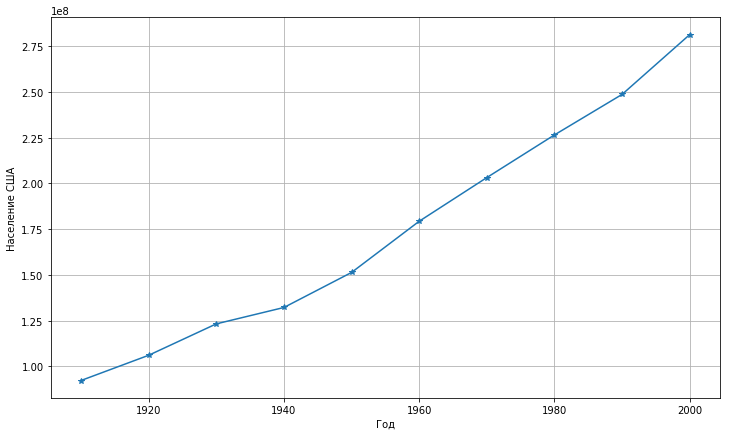

In [3]:
rcParams['figure.figsize'] = 12, 7

plt.plot(dates, populations, '*-')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()

Построить аппроксимацию на основе данных многочленов, а также полиномов Бернштейна и Чебышёва степеней N = 2, 3, 4, 5.
Какое представление является наилучшим?

$$\begin{align}
a) f(x) = \sum^N_{n=0}c_nx^n \ \ \ b)\ f(x) = \sum^N_{n=0}c_n(x - 1910)^n\ 
\\ c) f(x) = \sum\limits^N_{n=0}c_n(x - 1955)^n\ 
\ \ d) f(x) = \sum\limits^N_{n=0}c_n((x - 1955) / 45)^n
\end{align}$$

# 2. Вывод формул

Поскольку нам придётся проводить аппроксимацию для 4 степеней, логично получить формулы в общем (матричном) виде

$$
\large
\mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum\limits_{i=0}^n \left(y_i - f(x_i)\right)^2 = \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)$$

$$\large \frac{\partial \mathcal{L}}{\partial \vec{w}} = \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) = \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)$$

$$\large \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 \Leftrightarrow \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0$$

$$\large \Leftrightarrow X^T X \vec{w} = X^T \vec{y}$$

$$\large \Leftrightarrow \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$

Однако вычислять обратную матрицу такого вида мы не будем, вместо этого воспользуемся $QR$ разложением $X = QR$, 

где $Q$ - ортогональная, а $R$ - верхнетреугольная матрица.
Тогда
$$\large \vec{w} = R^{-1} Q^T \vec{y}$$

А верхнетреугольная матрица уже обращается без проблем.

# 3. Практическая часть

### 3.1 Многочлены первых 4 типов

$$\begin{align}
a) f(x) = \sum^N_{n=0}c_nx^n \ \ \ b)\ f(x) = \sum^N_{n=0}c_n(x - 1910)^n\ 
\\ c) f(x) = \sum\limits^N_{n=0}c_n(x - 1955)^n\ 
\ \ d) f(x) = \sum\limits^N_{n=0}c_n((x - 1955) / 45)^n
\end{align}$$

In [4]:
# Функция, возвращающая матрицу X, использованную при выводе формул
def power_features(x, p, family):
    if family == 'a':
        return np.array([np.ones(len(x))] + list(map(lambda n: x**n, range(1, p + 1)))).T
    elif family == 'b':
        return np.array([np.ones(len(x))] + list(map(lambda n: (x-1910)**n, range(1, p + 1)))).T
    elif family == 'c':
        return np.array([np.ones(len(x))] + list(map(lambda n: (x-1955)**n, range(1, p + 1)))).T
    elif family == 'd':
        return np.array([np.ones(len(x))] + list(map(lambda n: ((x-1955)/45)**n, range(1, p + 1)))).T
    else:
        raise NameError('No such polinom family')

In [5]:
def polynomial_approx(p, family, x_train=dates, y_train=populations, x_test=dates_with_2010, plot=False, return_value='pred'):
    X = power_features(x_train, p, family)
    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), y_train)

    X_test = power_features(x_test, p, family)
    y_predicted = np.dot(w, X_test.T)
    if plot:
        plt.plot(x_test, y_predicted, '*-', label='degree %d, family %s' % (p, family))
    if return_value == 'pred':
        return y_predicted
    elif return_value == 'cond':
        return cond(r)

[9.34851591e+07 1.04831073e+08 1.19088594e+08 1.36016509e+08
 1.55373603e+08 1.76918664e+08 2.00410477e+08 2.25607829e+08
 2.52269506e+08 2.80154294e+08 3.09020979e+08]


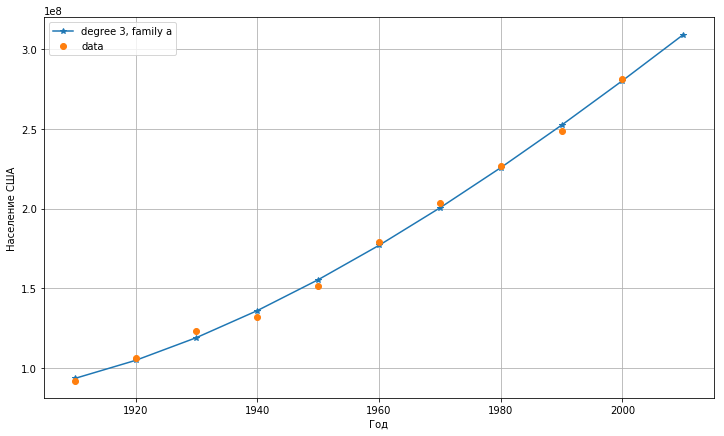

In [6]:
y_pred = polynomial_approx(3, 'a', plot=True)
print(y_pred)
plt.plot(dates, populations, 'o', label='data')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()
plt.legend();

In [7]:
rcParams['figure.figsize'] = 14, 8

Degree: 2, Family a, Loss: 9939695.511032
Degree: 2, Family b, Loss: 9939695.511042
Degree: 2, Family c, Loss: 9939695.511042
Degree: 2, Family d, Loss: 9939695.511042
Degree: 3, Family a, Loss: 8944668.739135
Degree: 3, Family b, Loss: 8944668.739275
Degree: 3, Family c, Loss: 8944668.739275
Degree: 3, Family d, Loss: 8944668.739275
Degree: 4, Family a, Loss: 9361205.979240
Degree: 4, Family b, Loss: 9361206.256903
Degree: 4, Family c, Loss: 9361206.256903
Degree: 4, Family d, Loss: 9361206.256903
Degree: 5, Family a, Loss: 32359940.173634
Degree: 5, Family b, Loss: 32359393.372748
Degree: 5, Family c, Loss: 32359393.372740
Degree: 5, Family d, Loss: 32359393.372740


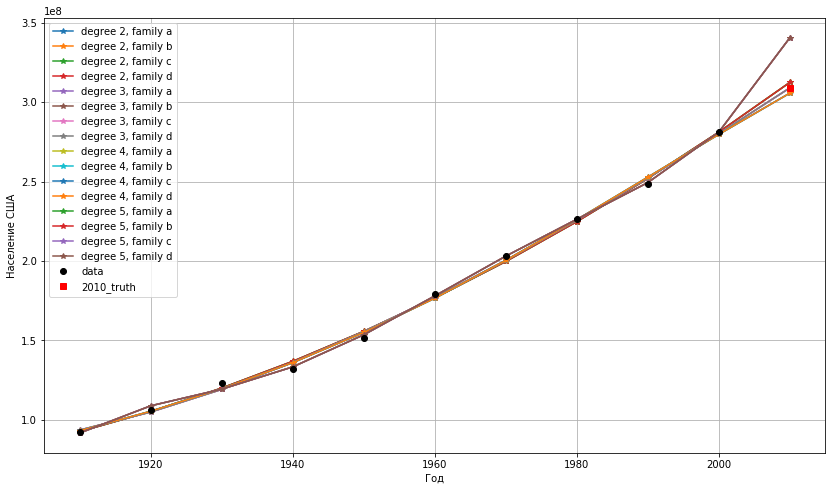

In [8]:
for degree in [2, 3, 4, 5]:
    for fam in ['a', 'b', 'c', 'd']:
        y_pred = polynomial_approx(degree, fam, plot=True)
        print('Degree: %d, Family %s, Loss: %f' % (degree, fam, np.linalg.norm(population_with_2010 - y_pred)))

plt.plot(dates, populations, 'o', color='black', label='data')
plt.plot(2010, 308745538, 'sr', label='2010_truth')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.legend()
plt.grid()

Лучшее качество (хотя некоторые различия косметические) показала аппроксимация несмещёнными полиномами 4-ой степени. В целом почти все аппроксимации передали направление верно, только некоторые полиномы 5-ой степени слишком сильно сместились вверх.

Поскольку сейчас у нас есть данные даже до 2018 года, попробуем добавим ещё одну точку. Визуализируем только предсказанные данные.

Degree: 2, Family a, Loss: 11701445.689981
Degree: 2, Family b, Loss: 11701445.689994
Degree: 2, Family c, Loss: 11701445.689994
Degree: 2, Family d, Loss: 11701445.689994
Degree: 3, Family a, Loss: 4758763.134794
Degree: 3, Family b, Loss: 4758763.135876
Degree: 3, Family c, Loss: 4758763.135877
Degree: 3, Family d, Loss: 4758763.135877
Degree: 4, Family a, Loss: 4321290.867933
Degree: 4, Family b, Loss: 4321291.998948
Degree: 4, Family c, Loss: 4321291.998948
Degree: 4, Family d, Loss: 4321291.998948
Degree: 5, Family a, Loss: 105838366.779557
Degree: 5, Family b, Loss: 105837726.008553
Degree: 5, Family c, Loss: 105837726.008539
Degree: 5, Family d, Loss: 105837726.008540


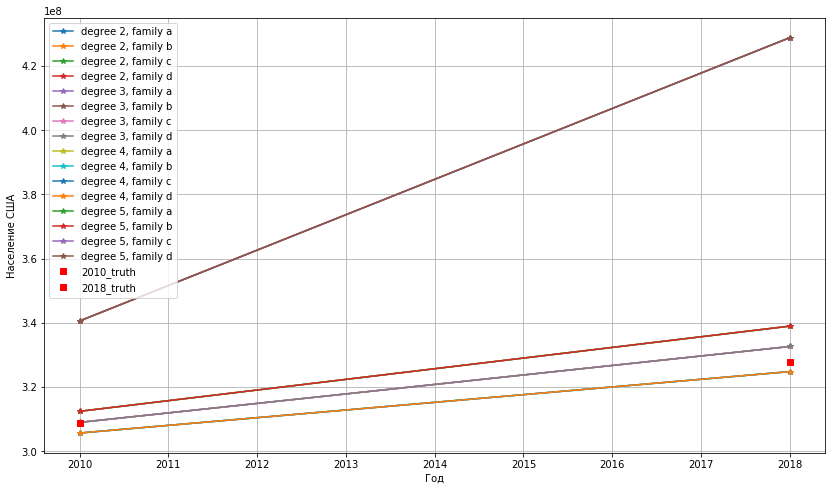

In [9]:
for degree in [2, 3, 4, 5]:
    for fam in ['a', 'b', 'c', 'd']:
        y_pred = polynomial_approx(degree, fam, 
                    x_test=np.array([2010, 2018]), plot=True)
        print('Degree: %d, Family %s, Loss: %f' % (degree, fam, 
                    np.linalg.norm(np.array([308745538, 327908413]) - y_pred)))

plt.plot(2010, 308745538, 'sr', label='2010_truth')
plt.plot(2018, 327908413, 'sr', label='2018_truth')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.legend()
plt.grid()

### 3.2 Полиномы Бернштена

Полиномы Бернштейна степени $N$ образуют базис для линейного пространства многочленов степени $N$.

Заранее отскалируем данные по годам наблюдения до отрезка [0, 1].

$b_{k,n}(x) = C_n^k\cdot x^k\cdot (1-x)^{n-k}$ - базисные полиномы Бернштейна

$f(x) = \sum \limits_{k=0}^{N} c_k \cdot b_{k,N}(x)$

In [10]:
def b(k, n, x):
    b = binom(n, k) * x**k * (1-x)**(n-k)
    return b

In [11]:
def bernstein_approx(p, x_train=dates, y_train=populations, x_test=dates_with_2010_2018, plot=False, return_value='pred'):
    if x_test is dates_with_2010_2018:
        X = np.array([[b(k, p, x) for k in range(p + 1)] for x in np.linspace(0, 1, len(x_train))])
        X_test = np.array([[b(k, p, x) for k in range(p + 1)] for x in np.linspace(0, 1 + 2.5/len(x_test), len(x_test))])
    elif x_test is dates_with_2010:
        X = np.array([[b(k, p, x) for k in range(p + 1)] for x in np.linspace(0, 1, len(x_train))])
        X_test = np.array([[b(k, p, x) for k in range(p + 1)] for x in np.linspace(0, 1 + 1.23/len(x_test), len(x_test))]) 

    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), y_train)
    
    y_predicted = np.dot(w, X_test.T)
    if plot:
        plt.plot(x_test, y_predicted, '*-', label='degree %d' % (p))
    if return_value == 'pred':
        return y_predicted
    elif return_value == 'cond':
        return cond(r)

In [12]:
rcParams['figure.figsize'] = 14, 7

Degree: 2, Loss: 17236680.330299
Degree: 3, Loss: 12751904.129698
Degree: 4, Loss: 11783954.611865
Degree: 5, Loss: 114498728.693894


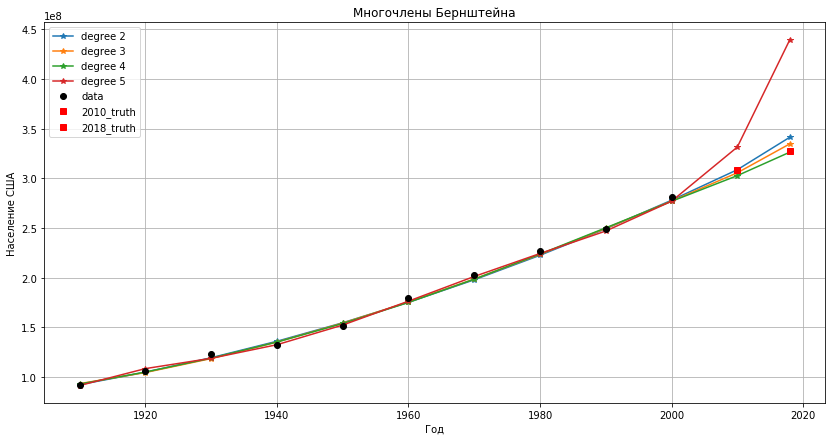

In [13]:
for degree in [2, 3, 4, 5]:
    y_pred = bernstein_approx(degree, plot=True)
    print('Degree: %d, Loss: %f' % (degree, np.linalg.norm(population_with_2010_2018 - y_pred)))

plt.plot(dates, populations, 'o', color='black', label='data')
plt.plot(2010, 308745538, 'sr', label='2010_truth')
plt.plot(2018, 327908413, 'sr', label='2018_truth')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.title('Многочлены Бернштейна')
plt.legend()
plt.grid()

### 3.3 Полиномы Чебышёва

$T_0(x) = 1, \, T_1(x)=x, \, T_{n+1}(x) = 2x\cdot T_n(x) - T_{n-1}(x)$ - полиномы 1-ого рода;

$U_0(x) = 1, \, U_1(x)=2x, \, U_{n+1}(x) = 2x\cdot U_n(x) - U_{n-1}(x)$ - полиномы 2-ого рода;

1) $f(x) = \sum \limits_{k=0}^{N} c_k \cdot T_k(x)\ \ \ \ 2) f(x) = \sum \limits_{k=0}^{N} c_k \cdot U_k(x)$

Отскалируем ось $x$ до области ортогональности полиномов Чебышева, то есть отрезка [-1, 1].

In [14]:
def T(N,x):
    Tpp, Tp = 1, x
    Ts = [Tpp, Tp]
    for i in range(2, N):
        T = 2*x*Tp - Tpp
        Ts.append(T)
        Tp, Tpp = T, Tp
    return Ts

def U(N,x):
    Tpp, Tp = 1, 2*x
    Ts = [Tpp, Tp]
    for i in range(2, N):
        T = 2*x*Tp - Tpp
        Ts.append(T)
        Tp, Tpp = T, Tp
    return Ts

In [15]:
def chebyshev_approx(p, func=T, x_train=dates, y_train=populations, x_test=dates_with_2010_2018, plot=False, return_value='pred'):
    if func == U:
        type_ = 'U'
    elif func == T:
        type_ = 'T'
    else: 
        raise NameError('No such Chebyshev polynom type')
        
    if x_test is dates_with_2010_2018:
        X = np.array([func(p+1, x) for x in np.linspace(-1, 1, len(x_train))])
        X_test = np.array([func(p+1, x) for x in np.linspace(-1, 1 + 5.5/len(x_test), len(x_test))])
    elif x_test is dates_with_2010:
        X = np.array([func(p+1, x) for x in np.linspace(-1, 1, len(x_train))])
        X_test = np.array([func(p+1, x) for x in np.linspace(-1, 1 + 2.45/len(x_test), len(x_test))])

    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), y_train)
    
    y_predicted = np.dot(w, X_test.T)
    if plot:
        plt.plot(x_test, y_predicted, '*-', label='degree %d, type %s' % (p, type_))
    if return_value == 'pred':
        return y_predicted
    elif return_value == 'cond':
        return cond(r)

Degree: 2, Family: T, Loss: 22932646.056081
Degree: 3, Family: T, Loss: 15759895.794178
Degree: 4, Family: T, Loss: 9719087.442185
Degree: 5, Family: T, Loss: 146648363.432808


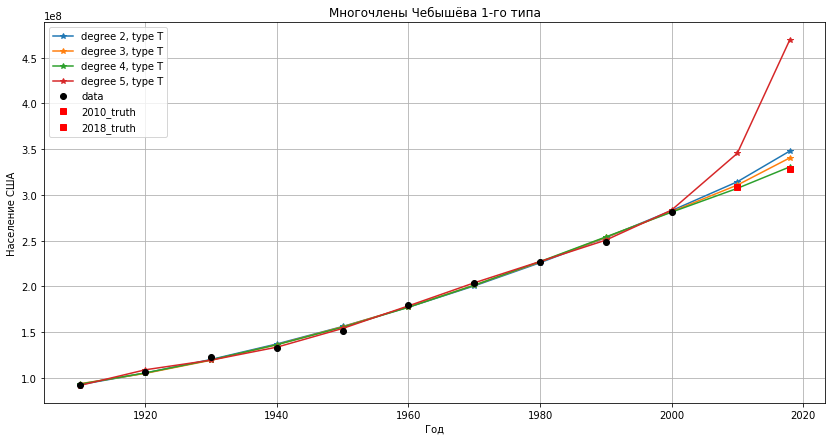

In [16]:
for degree in [2, 3, 4, 5]:
    y_pred = chebyshev_approx(degree, T, plot=True)
    print('Degree: %d, Family: T, Loss: %f' % (degree, np.linalg.norm(population_with_2010_2018 - y_pred)))
plt.plot(dates, populations, 'o', color='black', label='data')
plt.plot(2010, 308745538, 'sr', label='2010_truth')
plt.plot(2018, 327908413, 'sr', label='2018_truth')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.title('Многочлены Чебышёва 1-го типа')
plt.legend()
plt.grid()

Degree: 2, Family: U, Loss: 22932646.056081
Degree: 3, Family: U, Loss: 15759895.794178
Degree: 4, Family: U, Loss: 9719087.442185
Degree: 5, Family: U, Loss: 146648363.432809


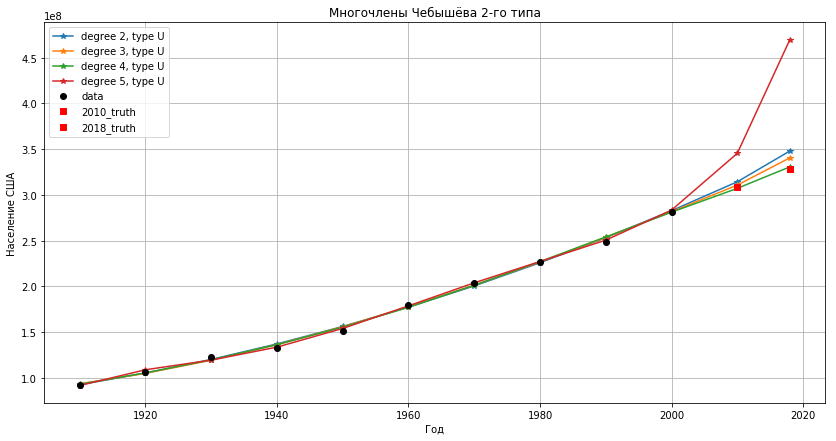

In [17]:
for degree in [2, 3, 4, 5]:
    y_pred = chebyshev_approx(degree, U, plot=True)
    print('Degree: %d, Family: U, Loss: %f' % (degree, np.linalg.norm(population_with_2010_2018 - y_pred)))

plt.plot(dates, populations, 'o', color='black', label='data')
plt.plot(2010, 308745538, 'sr', label='2010_truth')
plt.plot(2018, 327908413, 'sr', label='2018_truth')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.title('Многочлены Чебышёва 2-го типа')
plt.legend()
plt.grid()

Как видно из графиков, эти 2 типа эквивалентны.

# 4. Дополнительный анализ

### 4.1 Обусловленность

Degree: 3, Family: d, Loss: 10128033.248065
Degree: 3, Family: Berstein, Loss: 12751904.129698
Degree: 4, Family: Berstein, Loss: 11783954.611865
Degree: 5, Family: Chebyshev, Loss: 9719087.442185


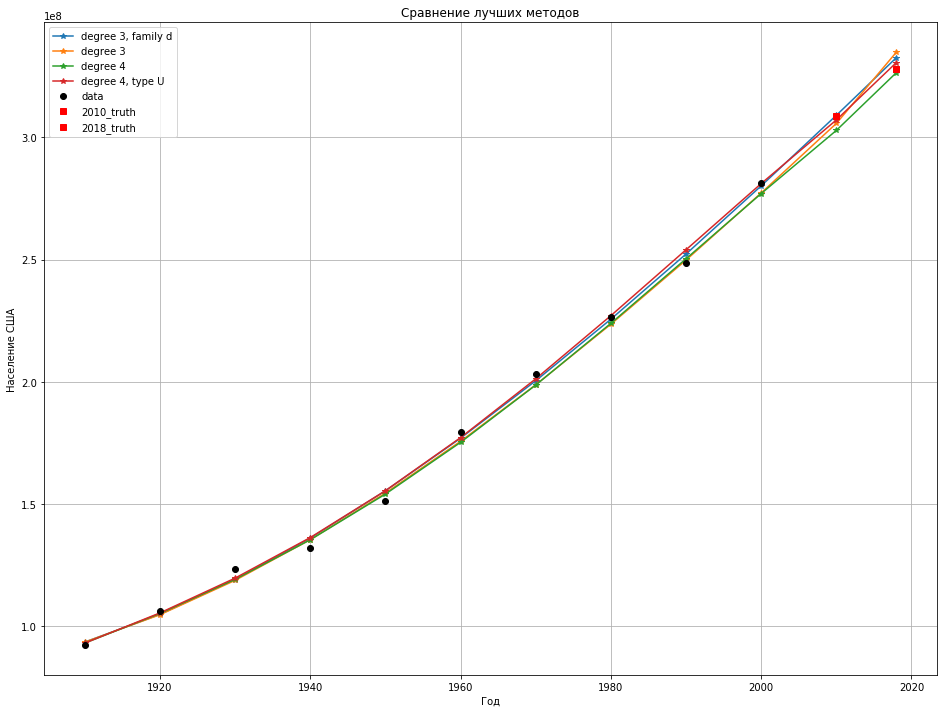

In [18]:
rcParams['figure.figsize'] = 16, 12

y_pred = polynomial_approx(3, 'd', x_test=dates_with_2010_2018, plot=True)
print('Degree: %d, Family: %s, Loss: %f' % (3, 'd', np.linalg.norm(population_with_2010_2018 - y_pred)))
y_pred = bernstein_approx(3, plot=True)
print('Degree: %d, Family: %s, Loss: %f' % (3, 'Berstein', np.linalg.norm(population_with_2010_2018 - y_pred)))
y_pred = bernstein_approx(4, plot=True)
print('Degree: %d, Family: %s, Loss: %f' % (4, 'Berstein', np.linalg.norm(population_with_2010_2018 - y_pred)))
y_pred = chebyshev_approx(4, U, plot=True)
print('Degree: %d, Family: %s, Loss: %f' % (degree, 'Chebyshev', np.linalg.norm(population_with_2010_2018 - y_pred)))

plt.plot(dates, populations, 'o', color='black', label='data')
plt.plot(2010, 308745538, 'sr', label='2010_truth')
plt.plot(2018, 327908413, 'sr', label='2018_truth')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.title('Сравнение лучших методов')
plt.legend()
plt.grid()

Видно, что лучшее качество показали полиномы Чебышёва 4-ой степени.

Также обратим внимание на обусловленность СЛАУ, разрешаемых в наших методах:

In [19]:
print('Degree: %d, Family: %s, Cond: %f' % (3, 'a', polynomial_approx(3, 'a', return_value='cond')))
print('Degree: %d, Family: %s, Cond: %f' % (3, 'b', polynomial_approx(3, 'b', return_value='cond')))
print('Degree: %d, Family: %s, Cond: %f' % (3, 'c', polynomial_approx(3, 'c', return_value='cond')))
print('Degree: %d, Family: %s, Cond: %f' % (3, 'd', polynomial_approx(3, 'd', return_value='cond')))
print('Degree: %d, Family: %s, Cond: %f' % (3, 'Berstein', bernstein_approx(3, return_value='cond')))
print('Degree: %d, Family: %s, Cond: %f' % (4, 'Berstein', bernstein_approx(3, return_value='cond')))
print('Degree: %d, Family: %s, Cond: %f' % (3, 'Chebyshev', chebyshev_approx(4, return_value='cond')))

Degree: 3, Family: a, Cond: 3180938031725456.000000
Degree: 3, Family: b, Cond: 900514.198488
Degree: 3, Family: c, Cond: 68993.804513
Degree: 3, Family: d, Cond: 7.044125
Degree: 3, Family: Berstein, Cond: 4.703730
Degree: 4, Family: Berstein, Cond: 4.703730
Degree: 3, Family: Chebyshev, Cond: 1.650657


У матриц полиномов Чебышёва и Бернштейна, а также многочленов семейства $d$ обусловленность хорошая. А матрицы многочленов типа a, b и c (особенно типа a!) хуже обусловлены по сравнению с остальными. Это говорит о большей ошибке решения данных СЛАУ и худшем качестве методов в целом, что и было подтверждено финальными результатами.

### 4.2 Эквивалентность методов

Степень полинома можно увеличивать до максимального значения (при котором аппроксимация перейдёт в интерполяцию). 
При этом многочлен пройдёт через все точки обучающего множества. Поскольку в нашем обучающем множестве их 10, степень max многочлена на 1 меньше, т.е. 9.
Визуализируем разложения по многочленам этой максимальной степени.

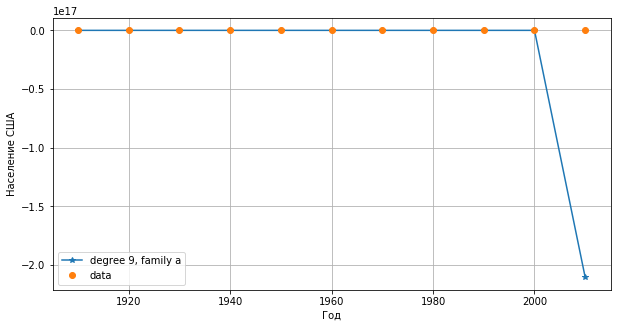

In [20]:
rcParams['figure.figsize'] = 10, 5
y_predicted = polynomial_approx(9, 'a')
plt.plot(dates_with_2010, y_predicted, '*-', label='degree 9, family a')
plt.plot(dates_with_2010, population_with_2010, 'o', label='data')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()
plt.legend()

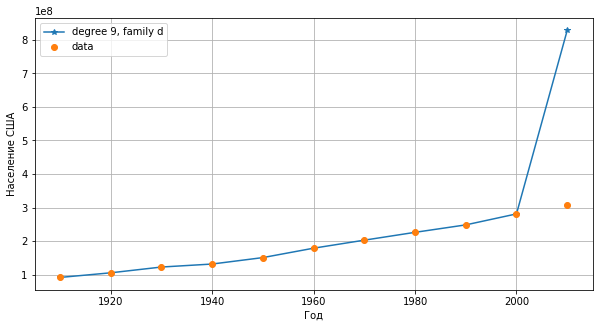

In [21]:
y_predicted = polynomial_approx(9, 'b')
plt.plot(dates_with_2010, y_predicted, '*-', label='degree 9, family d')
plt.plot(dates_with_2010, population_with_2010, 'o', label='data')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()
plt.legend()

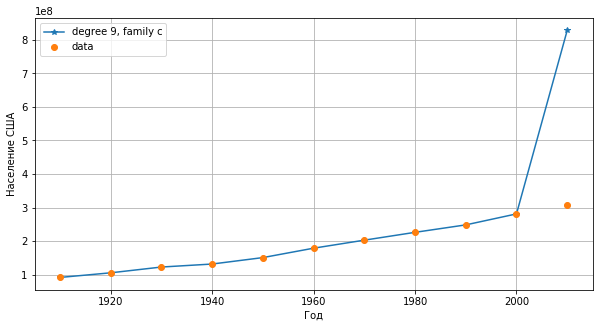

In [22]:
y_predicted = polynomial_approx(9, 'c')
plt.plot(dates_with_2010, y_predicted, '*-', label='degree 9, family c')
plt.plot(dates_with_2010, population_with_2010, 'o', label='data')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()
plt.legend()

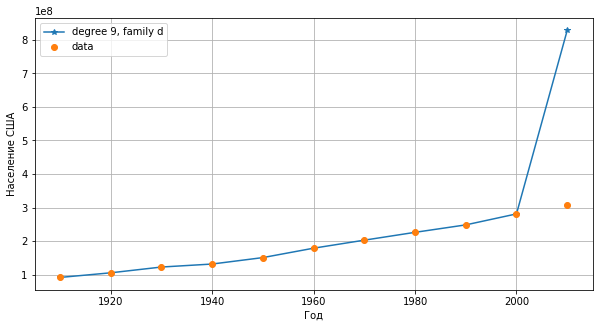

In [23]:
y_predicted = polynomial_approx(9, 'd')
plt.plot(dates_with_2010, y_predicted, '*-', label='degree 9, family d')
plt.plot(dates_with_2010, population_with_2010, 'o', label='data')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()
plt.legend()

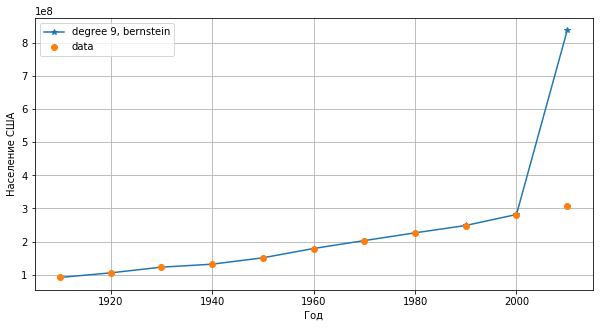

In [24]:
y_predicted = bernstein_approx(9, x_test=dates_with_2010)
plt.plot(dates_with_2010, y_predicted, '*-', label='degree 9, bernstein')
plt.plot(dates_with_2010, population_with_2010, 'o', label='data')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()
plt.legend()

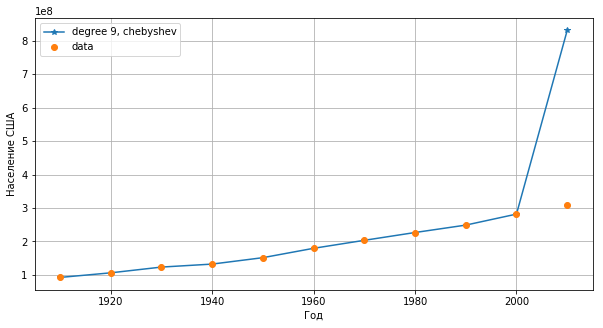

In [25]:
y_predicted = chebyshev_approx(9, x_test=dates_with_2010)
plt.plot(dates_with_2010, y_predicted, '*-', label='degree 9, chebyshev')
plt.plot(dates_with_2010, population_with_2010, 'o', label='data')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()
plt.legend();

Видно, что за исключением $x^n$ все разложения оказались одинаковы. Объяснить это можно следующим образом: расмотренные системы ортогональны и образуют базис в данном пространстве $\Rightarrow$ разложение единственно и эквивалентно. В случае $x^n$ получился неудовлетворительный результат, это должно быть связано с плохой обусловленностью и, как следствие, неустойчивым поведением.